# K Means Clustering

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the College_Data file using read_csv. Figure out how to set the first column as the index.**

In [6]:
df = pd.read_csv('./clean_data/adult_train.txt',index_col=False)

In [27]:
df.head()
#df.info()
#df.describe()

,age,type_employer,education,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,income
0,39,5,9,4,0,1,4,1,1,0,40,0
1,50,4,9,2,3,0,4,1,0,0,13,0
2,38,2,11,0,5,1,4,1,0,0,40,0
3,53,2,1,2,5,0,2,1,0,0,40,0
4,28,2,9,2,9,5,2,0,0,0,40,0


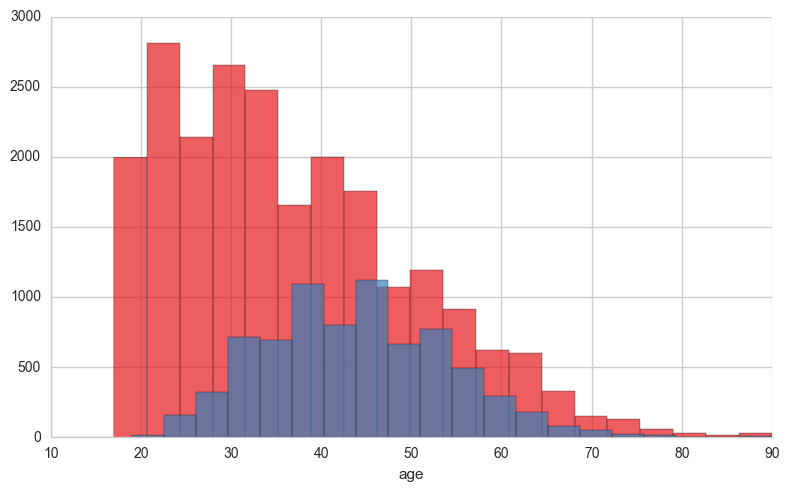

In [28]:
g = sns.FacetGrid(df,hue="income",palette="Set1",size=5,aspect=1.6)
g = g.map(plt.hist,'age',bins=20,alpha=0.7)

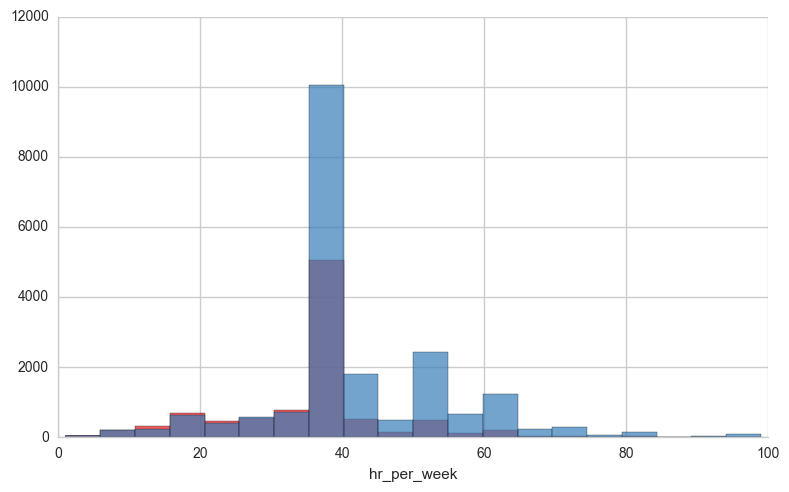

In [25]:
g = sns.FacetGrid(df,hue="sex",palette="Set1",size=5,aspect=1.6)
g = g.map(plt.hist,'hr_per_week',bins=20,alpha=0.7)

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2)

In [31]:
kmeans.fit(df.drop('income',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['income'],kmeans.labels_))
print(classification_report(df['income'],kmeans.labels_))

[[13959  8695]
 [ 2342  5166]]
             precision    recall  f1-score   support

          0       0.86      0.62      0.72     22654
          1       0.37      0.69      0.48      7508

avg / total       0.74      0.63      0.66     30162



## Let's normalize the Data

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [60]:
df_new = pd.DataFrame(scaled_data, columns = df.columns)

In [61]:
kmeans.fit(df_new.drop('income',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
print(confusion_matrix(df['income'],kmeans.labels_))
print(classification_report(df['income'],kmeans.labels_))

[[11327 11327]
 [ 1056  6452]]
             precision    recall  f1-score   support

          0       0.91      0.50      0.65     22654
          1       0.36      0.86      0.51      7508

avg / total       0.78      0.59      0.61     30162

